In [4]:
%pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the dataset
# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
data_path = path + "/HousingData.csv"

100%|██████████| 11.7k/11.7k [00:00<00:00, 33.8MB/s]

Extracting files...


In [9]:
data = pd.read_csv(data_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
data.isnull().sum()
# Handle missing values by filling with the mean of each column
data = data.fillna(data.mean(numeric_only=True))
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [16]:
print("\nDataset Info:")
print(data.info())
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959

In [17]:
# Separate features and target
X = data.drop('MEDV', axis=1)  # Assuming 'MEDV' is the target column
y = data['MEDV']

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# L1 Regularization (Lasso)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("Lasso Regression Results:")
print(f"Mean Squared Error: {lasso_mse:.2f}")
print(f"R² Score: {lasso_r2:.2f}")
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:")
print(lasso_coefs)

Lasso Regression Results:
Mean Squared Error: 32.98
R² Score: 0.65

Lasso Coefficients:
CRIM      -0.000000
ZN         0.000000
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         2.397208
AGE       -0.000000
DIS       -0.000000
RAD       -0.000000
TAX       -0.000000
PTRATIO   -1.404360
B          0.157348
LSTAT     -3.573400
dtype: float64


In [20]:
# L2 Regularization (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {ridge_mse:.2f}")
print(f"R² Score: {ridge_r2:.2f}")
ridge_coefs = pd.Series(ridge.coef_, index=X.columns)
print("\nRidge Coefficients:")
print(ridge_coefs)


Ridge Regression Results:
Mean Squared Error: 21.67
R² Score: 0.77

Ridge Coefficients:
CRIM      -0.875687
ZN         0.656541
INDUS     -0.245978
CHAS       0.716208
NOX       -2.080698
RM         2.537206
AGE       -0.109275
DIS       -2.789735
RAD        2.309417
TAX       -1.538033
PTRATIO   -2.157602
B          0.789431
LSTAT     -3.527490
dtype: float64


In [21]:
# Elastic Net
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_r2 = r2_score(y_test, y_pred_elastic)
print("\nElastic Net Results:")
print(f"Mean Squared Error: {elastic_mse:.2f}")
print(f"R² Score: {elastic_r2:.2f}")
elastic_coefs = pd.Series(elastic.coef_, index=X.columns)
print("\nElastic Net Coefficients:")
print(elastic_coefs)


Elastic Net Results:
Mean Squared Error: 34.13
R² Score: 0.64

Elastic Net Coefficients:
CRIM      -0.324997
ZN         0.000000
INDUS     -0.260760
CHAS       0.381881
NOX       -0.370494
RM         2.169802
AGE       -0.005128
DIS       -0.000000
RAD       -0.000000
TAX       -0.258149
PTRATIO   -1.322447
B          0.450466
LSTAT     -2.327623
dtype: float64


In [22]:
# Compare MSE and R²
models = ['Lasso', 'Ridge', 'Elastic Net']
mses = [lasso_mse, ridge_mse, elastic_mse]
r2s = [lasso_r2, ridge_r2, elastic_r2]

Text(0, 0.5, 'MSE')

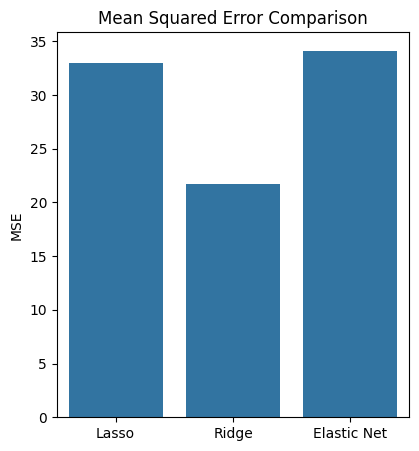

In [23]:
# Plot MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mses)
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')

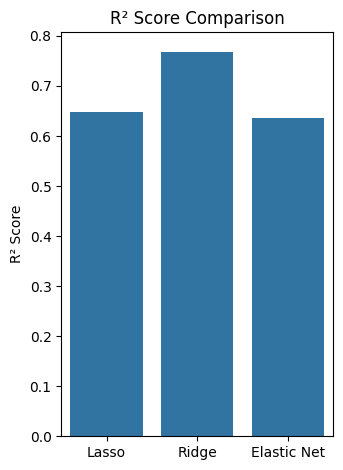

In [24]:
# Plot R²
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2s)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

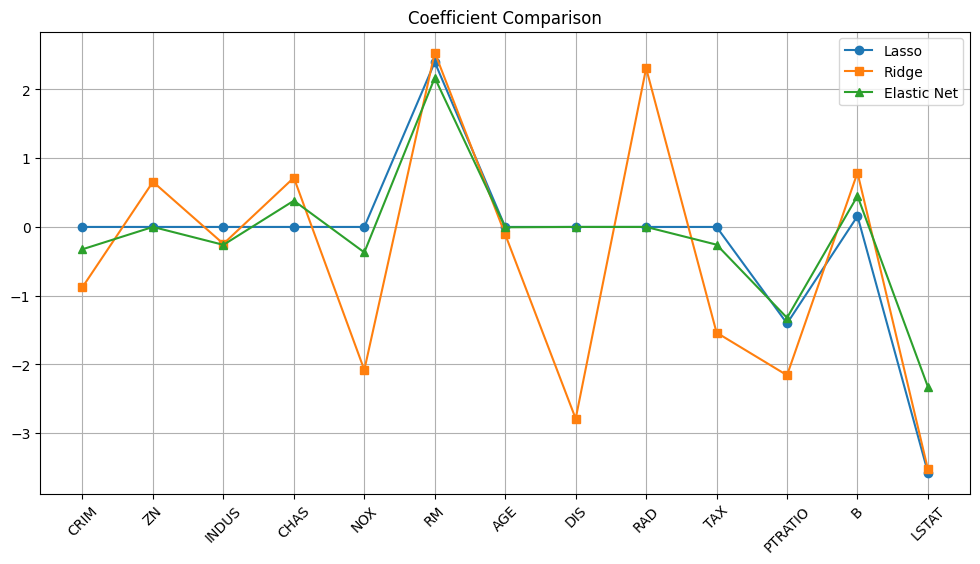

In [25]:
# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.plot(lasso_coefs, 'o-', label='Lasso')
plt.plot(ridge_coefs, 's-', label='Ridge')
plt.plot(elastic_coefs, '^-', label='Elastic Net')
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.title('Coefficient Comparison')
plt.legend()
plt.grid(True)
plt.savefig('coefficient_comparison.png')
plt.show()